# P2
## Lasse VUlto
## WIND DOWNSCALING SEPERATE NOTEBOOK

In [1]:
import os
import time
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cf
from scipy import stats
from tqdm import trange

import helper_functions as hf


C:\Users\Lasse\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading data again

In [2]:
# used in training
T_NCEP_down = np.load('Analysis/T_NCEP_down.npy')
U_NCEP_down = np.load('Analysis/U_NCEP_down.npy')
V_NCEP_down = np.load('Analysis/V_NCEP_down.npy')

# used in testing
T_NCEP_test_down = np.load('Analysis/T_NCEP_test_down.npy')
U_NCEP_test_down = np.load('Analysis/U_NCEP_test_down.npy')
V_NCEP_test_down = np.load('Analysis/V_NCEP_test_down.npy')

# make xarrays for ease of plotting and analysis
U_NCEP_down_toxr, V_NCEP_down_toxr, T_NCEP_down_toxr = np.squeeze(U_NCEP_down), np.squeeze(V_NCEP_down), np.squeeze(T_NCEP_down)
U_NCEP_test_down_toxr, V_NCEP_test_down_toxr, T_NCEP_test_down_toxr = np.squeeze(U_NCEP_test_down), np.squeeze(V_NCEP_test_down), np.squeeze(T_NCEP_test_down)

NCEP_down = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_NCEP_down_toxr),
        V = (['time', 'y', 'x'], V_NCEP_down_toxr),
        T = (['time', 'y', 'x'], T_NCEP_down_toxr))
)

NCEP_test_down = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_NCEP_test_down_toxr),
        V = (['time', 'y', 'x'], V_NCEP_test_down_toxr),
        T = (['time', 'y', 'x'], T_NCEP_test_down_toxr))
)


In [3]:
U_NCEP_down_regrid = hf.regrid(U_NCEP_down, 6)
V_NCEP_down_regrid = hf.regrid(V_NCEP_down, 6)
T_NCEP_down_regrid = hf.regrid(T_NCEP_down, 6)



In [4]:
NCEP_down_regrid = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_NCEP_down_regrid),
        V = (['time', 'y', 'x'], V_NCEP_down_regrid),
        T = (['time', 'y', 'x'], T_NCEP_down_regrid))
)

U_NCEP_down_regrid.shape

(4128, 96, 96)

In [5]:
T_WRF_3km = np.load('Analysis/T_WRF_3km.npy')
U_WRF_3km = np.load('Analysis/U_WRF_3km.npy')
V_WRF_3km = np.load('Analysis/V_WRF_3km.npy')

T_WRF_9km = np.load('Analysis/T_WRF_9km.npy')
U_WRF_9km = np.load('Analysis/U_WRF_9km.npy')
V_WRF_9km = np.load('Analysis/v_WRF_9km.npy')

T_WRF_3km_test = np.load('Analysis/T_WRF_3km_test.npy')
U_WRF_3km_test = np.load('Analysis/U_WRF_3km_test.npy')
V_WRF_3km_test = np.load('Analysis/V_WRF_3km_test.npy')

T_WRF_9km_test = np.load('Analysis/T_WRF_9km_test.npy')
U_WRF_9km_test = np.load('Analysis/U_WRF_9km_test.npy')
V_WRF_9km_test = np.load('Analysis/V_WRF_9km_test.npy')

# used in training
T_WRF_9km_down = hf.downscale_image(T_WRF_9km, 3)
U_WRF_9km_down = hf.downscale_image(U_WRF_9km, 3)
V_WRF_9km_down = hf.downscale_image(V_WRF_9km, 3)

# used in testing
T_WRF_9km_test_down = hf.downscale_image(T_WRF_9km_test, 3)
U_WRF_9km_test_down = hf.downscale_image(U_WRF_9km_test, 3)
V_WRF_9km_test_down = hf.downscale_image(V_WRF_9km_test, 3)

WRF_3km = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_WRF_3km),
        V = (['time', 'y', 'x'], V_WRF_3km),
        T = (['time', 'y', 'x'], T_WRF_3km))
)

WRF_9km = xr.Dataset(
    data_vars = dict(
        U = (['time', 'y', 'x'], U_WRF_9km),
        V = (['time', 'y', 'x'], V_WRF_9km),
        T = (['time', 'y', 'x'], T_WRF_9km))
)

T_WRF_9km_test_down_toxr, U_WRF_9km_test_down_toxr, V_WRF_9km_test_down_toxr = np.squeeze(T_WRF_9km_test_down), np.squeeze(U_WRF_9km_test_down), np.squeeze(V_WRF_9km_test_down)

WRF_9km_test = xr.Dataset(
      data_vars = dict(
        U = (['time', 'y', 'x'], U_WRF_9km_test_down_toxr),
        V = (['time', 'y', 'x'], V_WRF_9km_test_down_toxr),
        T = (['time', 'y', 'x'], T_WRF_9km_test_down_toxr))  
)



In [200]:
def compute_pdf(data1, data2):
    if not len(data1) == len(data2):
        print('sizes do not correspond!')

    # calculate the RMSE
    diff = data1 - data2
    square = diff**2
    sm = square.sum('x').sum('y')
    div = sm/(square.shape[1]*square.shape[2])
    rmse = div**(0.5)

    # calculate the PDF
    xs =  np.linspace(min(rmse)-1, max(rmse)+1, len(rmse))
    kde = stats.gaussian_kde(rmse)
    return xs, kde(xs)
    
U_pdf_NCEP_WRF3_x, U_pdf_NCEP_WRF3_kde = compute_pdf(NCEP_down_regrid.U, WRF_3km.U)
V_pdf_NCEP_WRF3_x, V_pdf_NCEP_WRF3_kde = compute_pdf(NCEP_down_regrid.V, WRF_3km.V)
T_pdf_NCEP_WRF3_x, T_pdf_NCEP_WRF3_kde = compute_pdf(NCEP_down_regrid.T, WRF_3km.T)

U_pdf_NCEP_WRF9_x, U_pdf_NCEP_WRF9_kde = compute_pdf(NCEP_down_regrid.U, WRF_9km.U)
V_pdf_NCEP_WRF9_x, V_pdf_NCEP_WRF9_kde = compute_pdf(NCEP_down_regrid.V, WRF_9km.V)
T_pdf_NCEP_WRF9_x, T_pdf_NCEP_WRF9_kde = compute_pdf(NCEP_down_regrid.T, WRF_9km.T)

KeyboardInterrupt: 

In [241]:
T_WRF_3km.shape

(4128, 96, 96)

## GAN time

In [ ]:
from torch.utils.data import TensorDataset, Dataset, DataLoader
from torch import Tensor
import torch.nn as nn
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F

slicer = 256




U_NCEP_train = np.reshape(U_NCEP_down, newshape=(4128,1,16,16))
V_NCEP_train = np.reshape(V_NCEP_down, newshape=(4128,1,16,16))

Wind_NCEP_train = np.concatenate((U_NCEP_train, V_NCEP_train), axis=1)


U_WRF_9km_train = np.reshape(U_WRF_9km_down, newshape=(4128,1,32,32))
V_WRF_9km_train = np.reshape(V_WRF_9km_down, newshape=(4128,1,32,32))

Wind_WRF_train = np.concatenate((U_WRF_9km_train, V_WRF_9km_train), axis=1)



train_low_res_wind = Tensor(Wind_NCEP_train[:slicer]).float()
train_high_res_wind = Tensor(Wind_WRF_train[:slicer]).float()

Wind_WRF_train.shape, Wind_NCEP_train.shape


batch_size=64
dataloader = DataLoader(list(zip(train_low_res_wind, train_high_res_wind)), batch_size=batch_size, shuffle=True) 

In [94]:
device = torch.device('cuda')
device

device(type='cuda')

In [95]:
for i,d in enumerate(dataloader):
    l,h = d
l.shape, h.shape

(torch.Size([64, 2, 16, 16]), torch.Size([64, 2, 32, 32]))

## Generator

In [96]:
class Generator(nn.Module): #This generator works in principle, Francesco approves 
    def __init__(self):
        super(Generator, self).__init__()


        self.a = nn.LeakyReLU()
        self.conv1 = nn.ConvTranspose2d(2, 32, kernel_size=4, stride=2, padding=1)
        self.a2 = nn.LeakyReLU()
        self.conv2 = nn.Conv2d(32,64, kernel_size = 3, stride=1, padding = 1)
        self.conv3 = nn.Conv2d(64,128, kernel_size = 3, stride=1, padding = 1)
        self.convout = nn.Conv2d(128,2, kernel_size = 3, stride=1, padding = 1)
        # self.a3 = nn.Tanh() # tried, didn't improve 

        
    def forward(self, LR): 
        img = self.a(self.conv1(LR))
        img = self.conv2(img)
        img = self.a2(img)
        img = self.conv3(img)
        img = self.a2(img)
        img = self.convout(img)
        img = self.a2(img)
        # img = self.a3(img) # suggestoin 
        
        return img
    

# Discriminator

In [97]:
class Discriminator(nn.Module): #This generator works in principle, Francesco approves 
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(2, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.conv6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.conv7 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.conv8 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        
        self.fc2 = nn.Sequential(
            nn.AdaptiveAvgPool2d((6 ,6)),
#             nn.Flatten(),
            nn.Linear(in_features=(32*32*512), out_features=1024),
            nn.LeakyReLU(0.2),
            nn.Linear(in_features=1024,out_features=2)
        )
        
        self.fc = nn.Sequential(
            nn.AdaptiveAvgPool2d((2, 2)),  # Adjust the output size
            nn.Flatten(),
            nn.Linear(in_features=(512 * 2 * 2), out_features=1024),
            nn.LeakyReLU(0.2),
            nn.Linear(in_features=1024, out_features=2),
            nn.Sigmoid()
        )
        
        self.out = nn.Linear(in_features = 512, out_features = 2)
    def forward(self,x):
        x = self.conv1(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv2(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv3(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv4(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv5(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv6(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv7(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        x = self.conv8(x)
        x = self.fc(x)
        
        return x

#### Optimizer

In [253]:
# suggested default - beta para
b1 = 0.5
b2 = 0.999

# suggested default - learning rate
lr_g = 9e-3
lr_d = 1e-5

generator = Generator()
discriminator = Discriminator()

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr_g, betas=(b1,b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr_d, betas=(b1,b2))

#### Loss

In [99]:
generator_loss = torch.nn.MSELoss()
discriminator_loss = torch.nn.BCELoss()
# torch.nn.CrossEntropyLoss(reduction='none')

# adversarial_loss = torch.nn.MSELoss()
# loss_fct = torch.nn.CrossEntropyLoss(reduction='none')

### Train

In [254]:

from torch.autograd import Variable
import torch.nn.functional as F

n_epochs = 150
n_pretrain = 2 # 5 for most succesful
alpha = 0.01

start_time = time.time() 

loss_per_epoch_generator = []
loss_per_epoch_discriminator = []
for epoch in range(n_epochs):
    epoch_time = time.time()
    
    loss_this_epoch_generator=[]
    loss_this_epoch_discriminator=[]

    ### PRETRAIN
    optimizer_G.zero_grad()
    if epoch < n_pretrain:
        print(f"Pretraining epoch {epoch}; time spent: {epoch_time - start_time:.2f} s")
        for i, (lowres, highres) in enumerate(dataloader):         

            highres_gen = generator(lowres)

            # pretrain_generator_loss = generator_loss(highres_gen, highres)
            g_loss = generator_loss(highres_gen, highres)

            loss_this_epoch_generator.append(g_loss.item())
            loss_this_epoch_discriminator.append(0)
            
            g_loss.backward()
            # pretrain_generator_loss.backward()# If didn't use detach() for gen_imgs, all weights of the generator will be calculated with backward(). 
            optimizer_G.step()
            
    ### TRAIN   
    if epoch>= n_pretrain:
        print(f"Training epoch {epoch}; time spent: {epoch_time - start_time:.2f} s")
        start_time = time.time()  

        for i, (lowres, highres_real) in enumerate(dataloader):

            time_i = time.time()
            if i%20 ==0:
                print(f'        Still running epoch {epoch}... i={i}/{len(dataloader)}')

            # make the tensors that will be compared in the adverserial losses
            valid_dis = Variable(Tensor(highres_real.size(0), 2).fill_(1.0), requires_grad=False) 
            fake_dis  = Variable(Tensor(highres_real.size(0), 2).fill_(0.0), requires_grad=False)    
            
            # generate the high resolution image
            highres_gen = generator(lowres)
### TRAIN GENERATOR 
            optimizer_G.zero_grad()

            # Loss measures generator's ability to fool the discriminator
            g_adverserial_loss = discriminator_loss(discriminator(highres_gen), valid_dis) # torch.nn.BCELoss() compare result(64x1) and valid(64x1, filled with 1)
            g_content_loss = generator_loss(highres_gen, highres_real)

            # alpha is a hyperparameter    
            g_loss = g_content_loss + (alpha * g_adverserial_loss)
            
            loss_this_epoch_generator.append(g_loss.item())
            
            # now backpropogate the total g_loss
            g_loss.backward(retain_graph=True)
            optimizer_G.step() 
            
            ### TRAIN DISCRIMINATOR
            optimizer_D.zero_grad()

            real_loss = discriminator_loss(discriminator(highres_real), valid_dis) 
            fake_loss = discriminator_loss(discriminator(highres_gen.detach()), fake_dis) 

            d_loss = (real_loss + fake_loss) / 2
            loss_this_epoch_discriminator.append(d_loss.item())

            d_loss.backward()
            optimizer_D.step()
            
               
            
            
            
            
            ### DYNAMICAL STEP; DO IT AGAIN IF DISCRIMINATOR LOSS IS TOO HIGH OR TOO LOW                 
            

            ### RETRAIN DISCRIMINATOR  
            dis_count = 0
            while d_loss.item() > 0.6 and (dis_count < 1):              
                highres_gen = generator(lowres)
                
                optimizer_D.zero_grad()

                real_loss = discriminator_loss(discriminator(highres_real), valid_dis) 
                fake_loss = discriminator_loss(discriminator(highres_gen.detach()), fake_dis) 

                d_loss = (real_loss + fake_loss) / 2
                loss_this_epoch_discriminator.append(d_loss.item())

                d_loss.backward()
                optimizer_D.step()

                dis_count += 1

            ### RETRAIN GENERATOR
            gen_count = 0
            while (d_loss.item() < 0.46) and (gen_count < 1):
                highres_gen = generator(lowres)
                
                optimizer_G.zero_grad()

                # Loss measures generator's ability to fool the discriminator
                g_adverserial_loss = discriminator_loss(discriminator(highres_gen), valid_dis) # torch.nn.BCELoss() compare result(64x1) and valid(64x1, filled with 1)
                g_content_loss = generator_loss(highres_gen, highres_real)

                # alpha is a hyperparameter    
                g_loss = g_content_loss + (alpha * g_adverserial_loss)

                loss_this_epoch_generator.append(g_loss.item())

                # now backpropogate the total g_loss
                g_loss.backward(retain_graph=True)
                optimizer_G.step()                

                gen_count += 1
                
    # compute the mean loss for this epoch
    mean_loss_discriminator = np.mean(loss_this_epoch_discriminator)
    mean_loss_generator = np.mean(loss_this_epoch_generator)
    
    loss_per_epoch_discriminator.append(mean_loss_discriminator)
    loss_per_epoch_generator.append(mean_loss_generator)
    
    print(f'        Discriminator loss: {mean_loss_discriminator:.4f}, Generator loss: {mean_loss_generator:.4f}')

            


Pretraining epoch 0; time spent: 0.00 s
        Discriminator loss: 0.0000, Generator loss: 17.4467
Pretraining epoch 1; time spent: 2.26 s
        Discriminator loss: 0.0000, Generator loss: 18.1974
Training epoch 2; time spent: 3.76 s
        Still running epoch 2... i=0/4
        Discriminator loss: 0.6267, Generator loss: 16.2072
Training epoch 3; time spent: 10.14 s
        Still running epoch 3... i=0/4
        Discriminator loss: 0.5290, Generator loss: 15.3621
Training epoch 4; time spent: 6.79 s
        Still running epoch 4... i=0/4
        Discriminator loss: 0.4652, Generator loss: 14.9839
Training epoch 5; time spent: 8.55 s
        Still running epoch 5... i=0/4
        Discriminator loss: 0.4072, Generator loss: 27.3731
Training epoch 6; time spent: 11.41 s
        Still running epoch 6... i=0/4
        Discriminator loss: 0.3827, Generator loss: 15.8612
Training epoch 7; time spent: 10.18 s
        Still running epoch 7... i=0/4
        Discriminator loss: 0.2720, Gener

        Discriminator loss: 0.0039, Generator loss: 22.7099
Training epoch 60; time spent: 10.06 s
        Still running epoch 60... i=0/4
        Discriminator loss: 0.0038, Generator loss: 22.2366
Training epoch 61; time spent: 10.16 s
        Still running epoch 61... i=0/4
        Discriminator loss: 0.0036, Generator loss: 22.0788
Training epoch 62; time spent: 10.16 s
        Still running epoch 62... i=0/4
        Discriminator loss: 0.0035, Generator loss: 21.7630
Training epoch 63; time spent: 11.25 s
        Still running epoch 63... i=0/4
        Discriminator loss: 0.0033, Generator loss: 21.5776
Training epoch 64; time spent: 10.08 s
        Still running epoch 64... i=0/4
        Discriminator loss: 0.0033, Generator loss: 21.3154
Training epoch 65; time spent: 10.03 s
        Still running epoch 65... i=0/4
        Discriminator loss: 0.0029, Generator loss: 21.3198
Training epoch 66; time spent: 10.09 s
        Still running epoch 66... i=0/4
        Discriminator loss:

        Discriminator loss: 0.0009, Generator loss: 16.2539
Training epoch 119; time spent: 10.21 s
        Still running epoch 119... i=0/4
        Discriminator loss: 0.0009, Generator loss: 16.2140
Training epoch 120; time spent: 10.21 s
        Still running epoch 120... i=0/4
        Discriminator loss: 0.0008, Generator loss: 16.1765
Training epoch 121; time spent: 14.59 s
        Still running epoch 121... i=0/4
        Discriminator loss: 0.0008, Generator loss: 16.1311
Training epoch 122; time spent: 13.73 s
        Still running epoch 122... i=0/4
        Discriminator loss: 0.0010, Generator loss: 16.1890
Training epoch 123; time spent: 10.33 s
        Still running epoch 123... i=0/4
        Discriminator loss: 0.0010, Generator loss: 16.4968
Training epoch 124; time spent: 10.14 s
        Still running epoch 124... i=0/4
        Discriminator loss: 0.0007, Generator loss: 16.4625
Training epoch 125; time spent: 10.14 s
        Still running epoch 125... i=0/4
        Discr

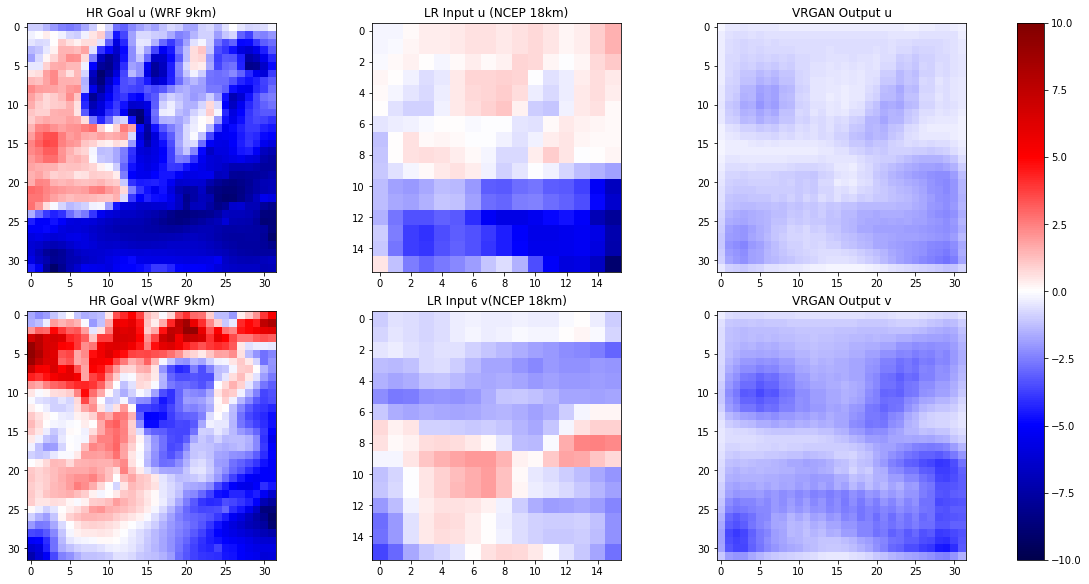

In [267]:
cmap = mpl.colormaps['seismic']
vmin, vmax = -10, 10
i = 11

fig, axs = plt.subplots(figsize=(16,8), ncols=3, nrows=2, constrained_layout=True)
im1 = axs[0,2].imshow(np.flipud(np.squeeze(generator(lowres)).detach()[i,0,:,:]), cmap = cmap, vmin=vmin, vmax=vmax)
axs[0,2].set_title('VRGAN Output u')

im2 = axs[0,1].imshow(np.flipud(np.squeeze(lowres.detach()[i,0,:,:])), vmin=vmin, vmax=vmax, cmap = cmap)
axs[0,1].set_title('LR Input u (NCEP 18km)')

im3 = axs[0,0].imshow(np.flipud(np.squeeze(highres.detach()[i,0,:,:])), vmin=vmin, vmax=vmax, cmap=cmap)
axs[0,0].set_title('HR Goal u (WRF 9km)')


im4 = axs[1,2].imshow(np.flipud(np.squeeze(generator(lowres).detach()[i,1,:,:])), cmap = cmap ,vmin=vmin, vmax=vmax)
axs[1,2].set_title('VRGAN Output v')

im5 = axs[1,1].imshow(np.flipud(np.squeeze(lowres.detach()[i,1,:,:])), vmin=vmin, vmax=vmax, cmap = cmap)
axs[1,1].set_title('LR Input v(NCEP 18km)')

im6 = axs[1,0].imshow(np.flipud(np.squeeze(highres.detach()[i,1,:,:])), vmin=vmin, vmax=vmax, cmap=cmap)
axs[1,0].set_title('HR Goal v(WRF 9km)')

cax,kw = mpl.colorbar.make_axes([ax for ax in axs.flat])
plt.colorbar(im1, cax=cax, **kw)



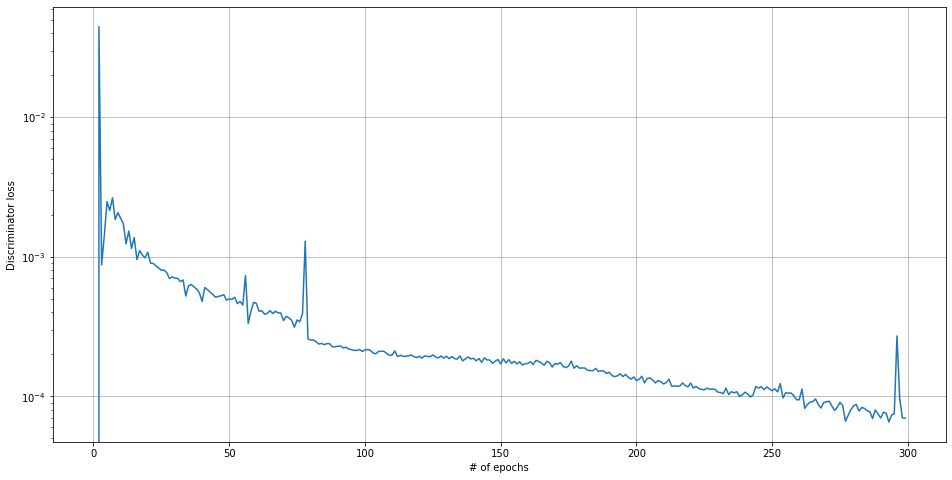

In [228]:
plt.figure(figsize=(16,8))
plt.plot(loss_per_epoch_discriminator)
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('Discriminator loss')
# plt.plot(loss_per_epoch_generator)
plt.yscale('log')

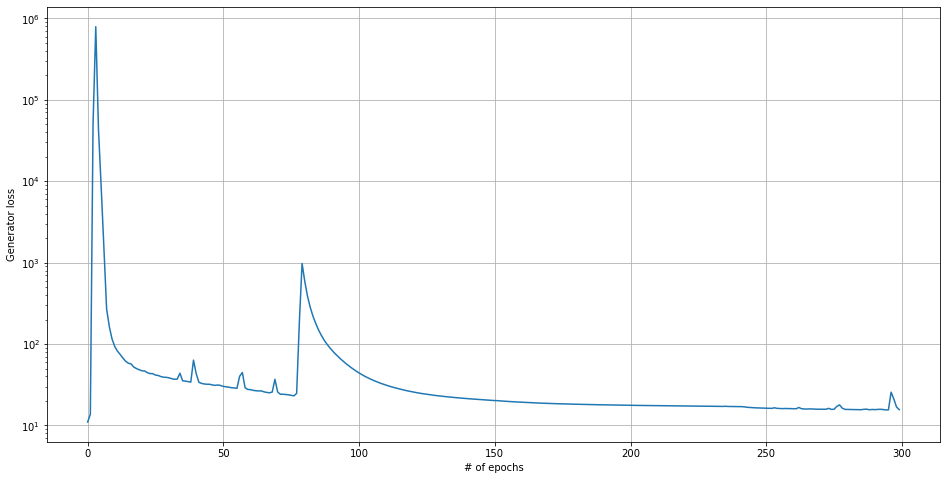

In [229]:
plt.figure(figsize=(16,8))
plt.plot(loss_per_epoch_generator)
plt.grid()
plt.xlabel('# of epochs')
plt.ylabel('Generator loss')
# plt.plot(loss_per_epoch_generator)
plt.yscale('log')

In [230]:
# U_NCEP_test = np.reshape(T_NCEP_test_down, newshape=(2920,1,16,16))

test_lr = Tensor(lowres).float()
test_hr = generator(lowres)

In [231]:
test_lr.shape, test_hr.shape


(torch.Size([64, 2, 16, 16]), torch.Size([64, 2, 32, 32]))

In [232]:
test_hr_numpy = np.squeeze(test_hr.detach().numpy())
# test_hr_numpy[0:,:].shape
# test_hr_regrid_u = hf.regrid(test_hr_numpy[0,:,:], 1)
# test_hr_regrid_v = hf.regrid(test_hr_numpy[1,:,:], 1)

# test_hr_numpy.shape, test_hr_regrid_u.shape,test_hr_regrid_v.shape

In [233]:
# test_hr_numpy[:,:1:,] 
u = test_hr_numpy[:, 0:1, :, :]
v = test_hr_numpy[:, 1:2, :, :]

In [234]:
u = np.squeeze(u)
v = np.squeeze(v)

In [235]:
print(v.shape)

(64, 32, 32)


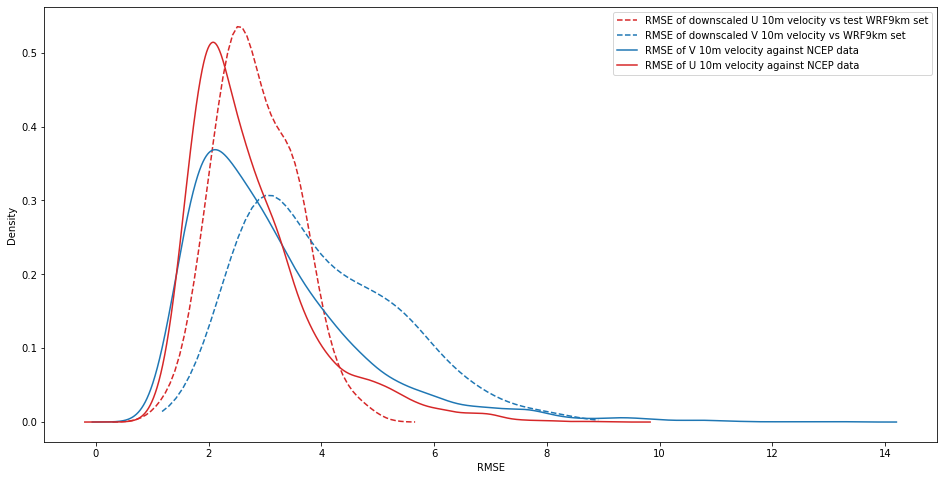

In [240]:
u_hr_test_x, u_hr_test_kde = compute_pdf(u, WRF_9km_test.U[:64,:,:])
v_hr_test_x, v_hr_test_kde = compute_pdf(v, WRF_9km_test.V[:64,:,:])

plt.figure(figsize=(16,8))

plt.plot(u_hr_test_x, u_hr_test_kde, label='RMSE of downscaled U 10m velocity vs test WRF9km set', c='tab:red', ls='--')
plt.plot(v_hr_test_x, v_hr_test_kde, label='RMSE of downscaled V 10m velocity vs WRF9km set', c=colors[0], ls='--')
plt.plot(V_pdf_NCEP_WRF9_x, V_pdf_NCEP_WRF9_kde, label='RMSE of V 10m velocity against NCEP data', c=colors[0])
plt.plot(U_pdf_NCEP_WRF9_x, U_pdf_NCEP_WRF9_kde, label='RMSE of U 10m velocity against NCEP data', c='tab:red')

plt.ylabel('Density')
plt.xlabel('RMSE')
plt.legend()


In [248]:
from torchsummary import summary
summary(generator, (2, 16, 16))

Layer (type:depth-idx)                   Output Shape              Param #
├─ConvTranspose2d: 1-1                   [-1, 32, 32, 32]          1,056
├─LeakyReLU: 1-2                         [-1, 32, 32, 32]          --
├─Conv2d: 1-3                            [-1, 64, 32, 32]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 32, 32]          --
├─Conv2d: 1-5                            [-1, 128, 32, 32]         73,856
├─LeakyReLU: 1-6                         [-1, 128, 32, 32]         --
├─Conv2d: 1-7                            [-1, 2, 32, 32]           2,306
├─LeakyReLU: 1-8                         [-1, 2, 32, 32]           --
Total params: 95,714
Trainable params: 95,714
Non-trainable params: 0
Total mult-adds (M): 97.78
Input size (MB): 0.00
Forward/backward pass size (MB): 1.77
Params size (MB): 0.37
Estimated Total Size (MB): 2.13


Layer (type:depth-idx)                   Output Shape              Param #
├─ConvTranspose2d: 1-1                   [-1, 32, 32, 32]          1,056
├─LeakyReLU: 1-2                         [-1, 32, 32, 32]          --
├─Conv2d: 1-3                            [-1, 64, 32, 32]          18,496
├─LeakyReLU: 1-4                         [-1, 64, 32, 32]          --
├─Conv2d: 1-5                            [-1, 128, 32, 32]         73,856
├─LeakyReLU: 1-6                         [-1, 128, 32, 32]         --
├─Conv2d: 1-7                            [-1, 2, 32, 32]           2,306
├─LeakyReLU: 1-8                         [-1, 2, 32, 32]           --
Total params: 95,714
Trainable params: 95,714
Non-trainable params: 0
Total mult-adds (M): 97.78
Input size (MB): 0.00
Forward/backward pass size (MB): 1.77
Params size (MB): 0.37
Estimated Total Size (MB): 2.13

In [250]:
summary(discriminator, (2, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 32, 32]          1,216
├─Sequential: 1-2                        [-1, 64, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 64, 16, 16]          36,928
|    └─BatchNorm2d: 2-2                  [-1, 64, 16, 16]          128
|    └─LeakyReLU: 2-3                    [-1, 64, 16, 16]          --
├─Sequential: 1-3                        [-1, 128, 16, 16]         --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         73,856
|    └─BatchNorm2d: 2-5                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-6                    [-1, 128, 16, 16]         --
├─Sequential: 1-4                        [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─BatchNorm2d: 2-8                  [-1, 128, 8, 8]           256
|    └─LeakyReLU: 2-9                    [-1, 128, 8, 8]          

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 32, 32]          1,216
├─Sequential: 1-2                        [-1, 64, 16, 16]          --
|    └─Conv2d: 2-1                       [-1, 64, 16, 16]          36,928
|    └─BatchNorm2d: 2-2                  [-1, 64, 16, 16]          128
|    └─LeakyReLU: 2-3                    [-1, 64, 16, 16]          --
├─Sequential: 1-3                        [-1, 128, 16, 16]         --
|    └─Conv2d: 2-4                       [-1, 128, 16, 16]         73,856
|    └─BatchNorm2d: 2-5                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-6                    [-1, 128, 16, 16]         --
├─Sequential: 1-4                        [-1, 128, 8, 8]           --
|    └─Conv2d: 2-7                       [-1, 128, 8, 8]           147,584
|    └─BatchNorm2d: 2-8                  [-1, 128, 8, 8]           256
|    └─LeakyReLU: 2-9                    [-1, 128, 8, 8]          